<h1>Using the default decision tree settings</h1>

In [1]:
# Gets the preprocessed data set for Organics.
import casestudy_tools as tools
df = tools.preprocess()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 37 columns):
AGE                    22223 non-null float64
BILL                   22223 non-null float64
ORGYN                  22223 non-null int64
AFFL                   22223 non-null int64
LTIME                  22223 non-null float64
GENDER_F               22223 non-null uint8
GENDER_M               22223 non-null uint8
GENDER_U               22223 non-null uint8
TV_REG_Border          22223 non-null uint8
TV_REG_C Scotland      22223 non-null uint8
TV_REG_East            22223 non-null uint8
TV_REG_London          22223 non-null uint8
TV_REG_Midlands        22223 non-null uint8
TV_REG_N East          22223 non-null uint8
TV_REG_N Scot          22223 non-null uint8
TV_REG_N West          22223 non-null uint8
TV_REG_S & S East      22223 non-null uint8
TV_REG_S West          22223 non-null uint8
TV_REG_Ulster          22223 non-null uint8
TV_REG_Wales & West    22223 non-null uint8
TV_RE

In [11]:
# Building a decision tree using the default settings.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Sets target column to ORGYN
target_dataset_organics = df['ORGYN'].loc[df['ORGYN'] == 1]
# Removes ORGYN from the dataset in order to avoid false predictor.
dataset_organics = df.loc[df['ORGYN'] == 1].drop(['ORGYN'], axis=1)

# Sets target column to ORGYN
target_dataset = df['ORGYN'].loc[df['ORGYN'] == 0]
# Removes ORGYN from the dataset in order to avoid false predictor.
dataset = df.loc[df['ORGYN'] == 0].drop(['ORGYN'], axis=1)


#print(target_dataset_organics)
#print(dataset_organics)

# Sets random state to 10. This will be kept consistently throughout the case study.
random_state = 10
# Sets the test size to be 30% of the total data set.
test_size = 0.3

# Transform the datasets into two matrices.
dataset_organics_matrix = dataset_organics.as_matrix()
dataset_matrix = dataset.as_matrix()

# Splits the data containing individuals purchasing organics into train and test sets.
dataset_train_organics, dataset_test_organics, target_dataset_train_organics, target_dataset_test_organics = train_test_split(dataset_organics_matrix,
                                                                                                                              target_dataset_organics,
                                                                                                                              test_size=test_size,
                                                                                                                              stratify=target_dataset_organics,
                                                                                                                              random_state=random_state
                                                                                                                             )

# Splits the data that DO NOT contain individuals purchasing organics into train and test sets.
dataset_train, dataset_test, target_dataset_train, target_dataset_test = train_test_split(dataset_matrix,
                                                                                          target_dataset,
                                                                                          test_size=test_size,
                                                                                          stratify=target_dataset,
                                                                                          random_state=random_state
                                                                                         )


dataset_train = np.concatenate((dataset_train, dataset_train_organics))
dataset_test = np.concatenate((dataset_test, dataset_test_organics))
target_dataset_train = np.concatenate((target_dataset_train, target_dataset_train_organics))
target_dataset_test = np.concatenate((target_dataset_test, target_dataset_test_organics))



In [12]:
# Training a decision tree model based on deafault settings.
decisiontree_model_def = DecisionTreeClassifier(random_state=random_state)
decisiontree_model_def.fit(dataset_train, target_dataset_train)

# Prints train and test accuracy.
print("Default Decision Tree Statistics:")
print("Train Accuracy:", decisiontree_model_def.score(dataset_train, target_dataset_train))
print("Test Accuracy:", decisiontree_model_def.score(dataset_test, target_dataset_test))

# Printing a classification report of the model.
print("")
print("Classification Report:")
target_predict = decisiontree_model_def.predict(dataset_test)
print(classification_report(target_dataset_test, target_predict))

Default Decision Tree Statistics:
Train Accuracy: 0.9988428158148506
Test Accuracy: 0.7302039592081584

Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.81      0.82      5016
          1       0.46      0.48      0.47      1652

avg / total       0.74      0.73      0.73      6668



In [14]:
# Evaluating the feature importance of the default_decision tree
import numpy as np

# Gets feature importance and relates to the column names of the model
feature_importances = decisiontree_model_def.feature_importances_
feature_names = dataset.columns

# Sorts the features
feature_indices = np.flip(np.argsort(feature_importances), axis=0)

# Prints the features
for i in feature_indices:
    print(feature_names[i], ':', feature_importances[i])

AGE : 0.2995128253939146
AFFL : 0.1487398413095103
BILL : 0.11690198945418485
LTIME : 0.10408067791618938
GENDER_F : 0.04378150284667894
NGROUP_B : 0.023111458150546105
NGROUP_D : 0.019841913586053684
NGROUP_F : 0.019415591926024996
NGROUP_C : 0.0182869908122781
NGROUP_E : 0.016609278806779454
TV_REG_London : 0.014253465016721725
TV_REG_East : 0.01333916423131015
TV_REG_Midlands : 0.013053919179244828
NGROUP_A : 0.012114525991489237
TV_REG_Wales & West : 0.011586735532480593
REGION_South East : 0.010578509637238363
CLASS_Silver : 0.010100845946487828
REGION_Midlands : 0.010076994762804955
TV_REG_N West : 0.009902275450553949
TV_REG_Yorkshire : 0.009377094960146257
TV_REG_S & S East : 0.008537037704117416
REGION_North : 0.007953242455105316
CLASS_Tin : 0.007613868403451999
CLASS_Gold : 0.007455433650216815
TV_REG_N East : 0.007353608969363292
REGION_Scottish : 0.007261381969294175
TV_REG_C Scotland : 0.0055313207554182125
REGION_South West : 0.004609649810061844
TV_REG_N Scot : 0.003891

In [4]:
# Creates a png-file of the default decision tree in order to visualise it.
tools.visualize_decision_tree(decisiontree_model_def, feature_names, "Default Decision Tree - Task 2.png")

In [15]:

# Training a decision tree model based on deafault settings.
decisiontree_model_optimal = DecisionTreeClassifier(max_depth=5, random_state=random_state)
decisiontree_model_optimal.fit(dataset_train, target_dataset_train)

train_accuracy = decisiontree_model_optimal.score(dataset_train, target_dataset_train)
test_accuracy = decisiontree_model_optimal.score(dataset_test, target_dataset_test)
# Prints train and test accuracy.
print("Decision Tree Statistics:")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Accuracy Difference:", train_accuracy - test_accuracy)

# Printing a classification report of the model.
print("")
print("Classification Report:")
target_predict = decisiontree_model_optimal.predict(dataset_test)
print(classification_report(target_dataset_test, target_predict))


Decision Tree Statistics:
Train Accuracy: 0.8170363227258116
Test Accuracy: 0.8179364127174565
Accuracy Difference: -0.0009000899916449256

Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.96      0.89      5016
          1       0.76      0.39      0.51      1652

avg / total       0.81      0.82      0.80      6668



In [16]:
# Evaluating the feature importance of the default_decision tree
import numpy as np

# Gets feature importance and relates to the column names of the model
feature_importances = decisiontree_model_optimal.feature_importances_
feature_names = dataset.columns

# Sorts the features
feature_indices = np.flip(np.argsort(feature_importances), axis=0)

# Prints the features
for i in feature_indices:
    print(feature_names[i], ':', feature_importances[i])

AGE : 0.516924937012977
AFFL : 0.3196926630693798
GENDER_F : 0.14591439056800373
GENDER_U : 0.007909029876713271
GENDER_M : 0.003571719792849624
BILL : 0.0017823704075580536
LTIME : 0.0016058328544125348
TV_REG_N East : 0.0015170411147020285
NGROUP_U : 0.001082015303403812
TV_REG_S West : 0.0
TV_REG_C Scotland : 0.0
TV_REG_East : 0.0
TV_REG_London : 0.0
TV_REG_Midlands : 0.0
TV_REG_Border : 0.0
TV_REG_N Scot : 0.0
TV_REG_N West : 0.0
TV_REG_S & S East : 0.0
CLASS_Tin : 0.0
CLASS_Silver : 0.0
REGION_Midlands : 0.0
CLASS_Platinum : 0.0
CLASS_Gold : 0.0
REGION_South West : 0.0
REGION_South East : 0.0
REGION_Scottish : 0.0
REGION_North : 0.0
NGROUP_F : 0.0
TV_REG_Wales & West : 0.0
NGROUP_E : 0.0
NGROUP_D : 0.0
NGROUP_C : 0.0
NGROUP_B : 0.0
NGROUP_A : 0.0
TV_REG_Yorkshire : 0.0
TV_REG_Ulster : 0.0


In [7]:
# Creates a png-file of the optimal decision tree in order to visualise it.
tools.visualize_decision_tree(decisiontree_model_optimal, feature_names, "Optimal Decision Tree - Task 2.png")

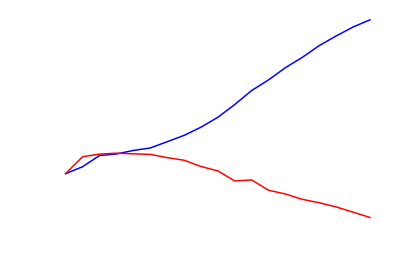

This shows that the optimal node depth of the decision tree is 5.
Anything over a max depth of 5 is considered to overfit the model to the train data.


In [18]:
# Visualising relationship between hyperparameters and model performance
import matplotlib.pyplot as plt
%matplotlib inline

# Sets the color to white.
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(dataset_train, target_dataset_train)
    
    test_score.append(model.score(dataset_test, target_dataset_test))
    train_score.append(model.score(dataset_train, target_dataset_train))

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

print("This shows that the optimal node depth of the decision tree is 5.")
print("Anything over a max depth of 5 is considered to overfit the model to the train data.")

<h1>Using CVSearch</h1>

In [21]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(10, 50, 10)}

cross_validation_model = GridSearchCV(param_grid=params,
                                      estimator=DecisionTreeClassifier(random_state=random_state),
                                      cv=10)
cross_validation_model.fit(dataset_train, target_dataset_train)

print("Train accuracy:", cross_validation_model.score(dataset_train, target_dataset_train))
print("Test accuracy:", cross_validation_model.score(dataset_test, target_dataset_test))

# test the best model
target_prediction = cross_validation_model.predict(dataset_test)
print(classification_report(target_dataset_test, target_prediction))

# print parameters of the best model
print(cross_validation_model.best_params_)


Train accuracy: 0.8152362584378013
Test accuracy: 0.8168866226754649
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      5016
          1       0.71      0.44      0.54      1652

avg / total       0.81      0.82      0.80      6668

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}


In [20]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(1, 2)}

cross_validation_optimal_model = GridSearchCV(param_grid=params,
                                      estimator=DecisionTreeClassifier(random_state=random_state),
                                      cv=10)
cross_validation_optimal_model.fit(dataset_train, target_dataset_train)

train_accuracy_optimal_cv = cross_validation_optimal_model.score(dataset_train, target_dataset_train)
test_accuracy_optimal_cv = cross_validation_optimal_model.score(dataset_test, target_dataset_test)
# Prints train and test accuracy.
print("Decision Tree Statistics:")
print("Train Accuracy:", train_accuracy_optimal_cv)
print("Test Accuracy:", test_accuracy_optimal_cv)
print("Accuracy Difference:", train_accuracy_optimal_cv - test_accuracy_optimal_cv)


# test the best model
target_prediction = cross_validation_optimal_model.predict(dataset_test)
print(classification_report(target_dataset_test, target_prediction))

# print parameters of the best model
print(cross_validation_optimal_model.best_params_)

Decision Tree Statistics:
Train Accuracy: 0.8152362584378013
Test Accuracy: 0.8168866226754649
Accuracy Difference: -0.0016503642376635153
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      5016
          1       0.71      0.44      0.54      1652

avg / total       0.81      0.82      0.80      6668

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}


In [22]:
# Gets feature importance and relates to the column names of the model
feature_importances_cv = cross_validation_optimal_model.best_estimator_.feature_importances_
feature_names_cv = dataset.columns

# Sorts the features
feature_indices_cv = np.flip(np.argsort(feature_importances_cv), axis=0)

# Prints the features
for i in feature_indices_cv:
    print(feature_names_cv[i], ':', feature_importances_cv[i])

AGE : 0.5177817946968515
AFFL : 0.32295547554984944
GENDER_F : 0.15336051893436994
GENDER_U : 0.005902210818929138
TV_REG_London : 0.0
TV_REG_S & S East : 0.0
TV_REG_N West : 0.0
TV_REG_N Scot : 0.0
TV_REG_N East : 0.0
TV_REG_Midlands : 0.0
TV_REG_C Scotland : 0.0
TV_REG_East : 0.0
CLASS_Silver : 0.0
TV_REG_Border : 0.0
GENDER_M : 0.0
LTIME : 0.0
BILL : 0.0
TV_REG_S West : 0.0
CLASS_Tin : 0.0
TV_REG_Wales & West : 0.0
REGION_Midlands : 0.0
CLASS_Platinum : 0.0
CLASS_Gold : 0.0
REGION_South West : 0.0
REGION_South East : 0.0
REGION_Scottish : 0.0
REGION_North : 0.0
NGROUP_U : 0.0
TV_REG_Yorkshire : 0.0
NGROUP_F : 0.0
NGROUP_E : 0.0
NGROUP_D : 0.0
NGROUP_C : 0.0
NGROUP_B : 0.0
NGROUP_A : 0.0
TV_REG_Ulster : 0.0


In [12]:
# Creates a png-file of the optimal decision tree in order to visualise it.
tools.visualize_decision_tree(cross_validation_optimal_model.best_estimator_, feature_names, "Optimal Decision Tree by Cross-validation - Task 2.png")